# EDA — Supervised labels

### Requirements

**1.** Outline dataset properties, correlations and inter-dependencies

**2.** Focus on highlighting AD values for each feature

Particular attention is to be paid to the *MRI / PET* co-ordinates to identify patterns among candidates that suffer from Alzheimer's disease.

### Problem statement

**Overview**

This processed *ADNI* dataset comprises of demographic, medical and MRI / PET (PETPVE12) analysis of the ADNI-3 dataset. The dataset contains information about each subject and their diagnosis (defined in section `2a.supervised_data_model_prep`). 

Data analysis will be undertaken to determine if new ranges for cognitive assessment scores, MRI and demographic attributes can be extrapolated — providing a new criteria for diagnosis symptomatic Alzheimers disease. This analysis will compared with the unsupervised data analysis (found in section `3b.unsupervised_eda`)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Styling props**

In [2]:
accent = '#FF8811'
accent_light = '#FFE1C3'

secondary = '#9DD9D2'
secondary_light = '#E6F5F4'

tertiary = '#392F5A'
tertiary_light = '#C9C2DF'

ALL_BOXPLOT_STYLE = {
    'boxprops':{'facecolor':'none', 'edgecolor': secondary_light },
    'medianprops':{'color': secondary_light },
    'whiskerprops':{'color':'#9DD9D2'},
    'capprops':{'color':'#9DD9D2'}
}
AD_BOXPLOT_STYLE = {
    'boxprops':{'facecolor':'none', 'edgecolor': accent},
    'medianprops':{'color': accent_light},
    'whiskerprops':{'color':'#FF8811'},
    'capprops':{'color':'#FF8811'}
}

ALL_HISTPLOT_STYLE = {
    'edgecolor': 'w',
    'color': secondary_light
}
AD_HISTPLOT_STYLE = {
    'edgecolor': 'w',
    'color': accent,
}

### Dataset preparation

In [3]:
df = pd.read_csv('working/supervised_combined.csv')
non_ad_df = df[df['AD_LABEL'] != 3]
ad_df = df[df['AD_LABEL'] == 3]

### Analysis pipeline

- Check distributions of all variables category
- Illustrate the ranges and distributions of AD labelled patients in category
- Correlation of variables within each dataset

**Color codes**
- **Blue** $\rightarrow$ Indicates entire range for CN, MCI and AD labels
- **Purple** $\rightarrow$ Indicates CN and MCI labels
- **Orange** $\rightarrow$ Indicates entire range for AD labels **only**

### Label ranges

Summarise the ranges for each feature within each category.

In [4]:
df.groupby(by='AD_LABEL').agg(['min', 'max'])

RID            AGE          PTGENDER     PTEDUCAT       MOTHDEM  \
          min   max      min      max      min max      min   max     min   
AD_LABEL                                                                    
1.0        21  6624  57.6564  92.8433        0   1     11.0  20.0     0.0   
2.0        56  6622  56.9637  93.5551        0   1      8.0  20.0     0.0   
3.0       112  6602  56.5448  95.0062        0   1     12.0  20.0     0.0   

               ... wm-rh-temporalpole           wm-rh-transversetemporal  \
          max  ...                min       max                      min   
AD_LABEL       ...                                                         
1.0       1.0  ...           0.742063  1.988910                 0.409969   
2.0       1.0  ...           0.820385  2.287555                 0.513238   
3.0       1.0  ...           0.675811  3.487843                 0.490544   

                   wm-rh-insula           wm-lh-Unsegmented            \
               max          min       max               min       max   
AD_LABEL                                                                
1.0       1.788683     0.849936  1.766894          0.667588  1.884873   
2.0       1.908839     0.906851  2.024760          0.603569  1.678433   
3.0       2.751318     0.920446  2.701695          0.598425  2.385331   

         wm-rh-Unsegmented            
                       min       max  
AD_LABEL                              
1.0               0.548918  1.845602  
2.0               0.575140  1.730853  
3.0               0.686599  1.849129  

[3 rows x 392 columns]

### Demographic

The gender distribution is slightly imbalanced with there being 26 more females than males (9.5% difference).

1    295
0    269
Name: PTGENDER, dtype: int64


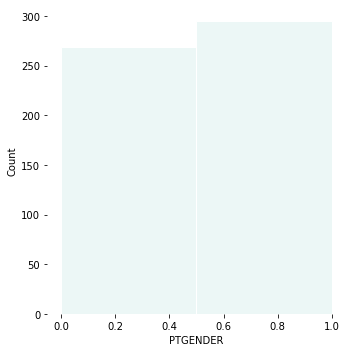

In [5]:
print(df['PTGENDER'].value_counts())
sns.displot(df['PTGENDER'], binwidth=0.5, **ALL_HISTPLOT_STYLE)

# remove borders
sns.despine(left=True, bottom=True)

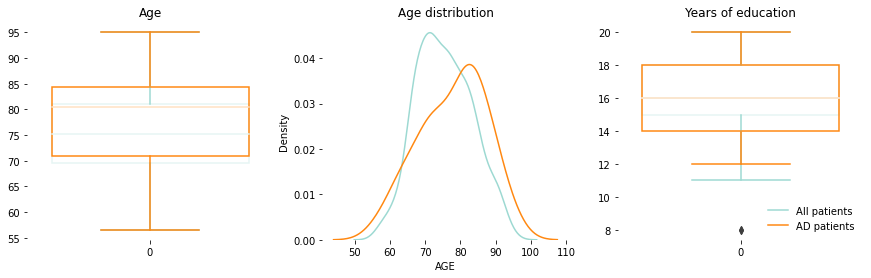

In [6]:
fig, axs = plt.subplots(ncols=3, figsize=(15, 4))


sns.boxplot(data=df['AGE'], orient="v", ax=axs[0], **ALL_BOXPLOT_STYLE)
sns.kdeplot(df['AGE'], ax=axs[1], color=secondary)
sns.boxplot(data=df['PTEDUCAT'], orient="v", ax=axs[2], **ALL_BOXPLOT_STYLE)

# overlap AD subjects
sns.boxplot(data=ad_df['AGE'].values, orient="v", ax=axs[0], **AD_BOXPLOT_STYLE)
sns.kdeplot(ad_df['AGE'], ax=axs[1], color=accent)
x = sns.boxplot(data=ad_df['PTEDUCAT'].values, orient="v", ax=axs[2], **AD_BOXPLOT_STYLE)

for ax, col in zip(axs, ['Age', 'Age distribution', 'Years of education']):
    ax.set_title(col)
    
leg = axs[-1].legend(labels=['All patients', 'AD patients'], loc="lower right", frameon=False)    
leg.legendHandles[1].set_color(accent)

# remove borders
sns.despine(left=True, bottom=True)

- From the skewness value of `0.158` we can assume that the age is distribution is **fairly symmetrical**.

- The kurtosis value of `-0.54` indicates a **leptokurtic / mesokurtic** distribution where more of the values are centralised
around the mean.

In [7]:
df_age = df['AGE']
print(f"""
      min age: {df_age.min()}
      max age: {df_age.max()}
      mean age: {df_age.mean()}
      mean male age: {df_age.mean()}
      std. dev: {df_age.std()}
      skewness: {df_age.skew()}
      kurtosis: {df_age.kurtosis()}
""")


      min age: 56.5448
      max age: 95.0062
      mean age: 75.45456631205674
      mean male age: 75.45456631205674
      std. dev: 7.867363926900466
      skewness: 0.15836930310849154
      kurtosis: -0.5487898055196712



Both `age` appears to have a relatively strong correlation (`0.26`) with AD diagnosis.

<AxesSubplot:title={'center':'Demographic correlation plot'}>

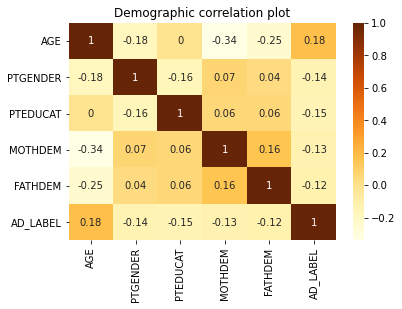

In [8]:
cols = list(df.iloc[:, 1:6].head().columns) + ['AD_LABEL']
axs = plt.axes()
axs.set_title("Demographic correlation plot")
sns.heatmap(
    np.round(df[cols].corr(), 2),
    fmt='g',
    annot=True,
    cmap='YlOrBr',
)

### Cognitive assessments

**Columns analysed**
- PHC_MEM 
- PHC_EXF 
- PHC_LAN 
- AD_LABEL 
- ADAS_TOTAL 
- CBB_SCORE_% 
- CDR 
- MMSE 
- MODHACH_SCORE 
- NPITOTAL 
- LOG_MEM_IMM_TOTAL 
- LOG_MEM_DEL_TOTAL 
- COMP_MEM_SCORE 
- COMP_EXEC_FUNC_SCORE

In [9]:
cog_df = df.iloc[:, 6:20]

There appears to be a **strong, positive** correlation between `CDR` (0.75), `NPITOTAL` (0.45) and `ADAS_TOTAL` (0.62) and `AD_LABEL`.

While all other cognitive assessment features (`MMSE`, `Logical Memory Recall`,  `Composite Memory Recall` and `PHC`) shows a **negative correlation** with `AD_LABEL`.

Text(0.5, 1.0, 'Cognitive assessment correlation plot')

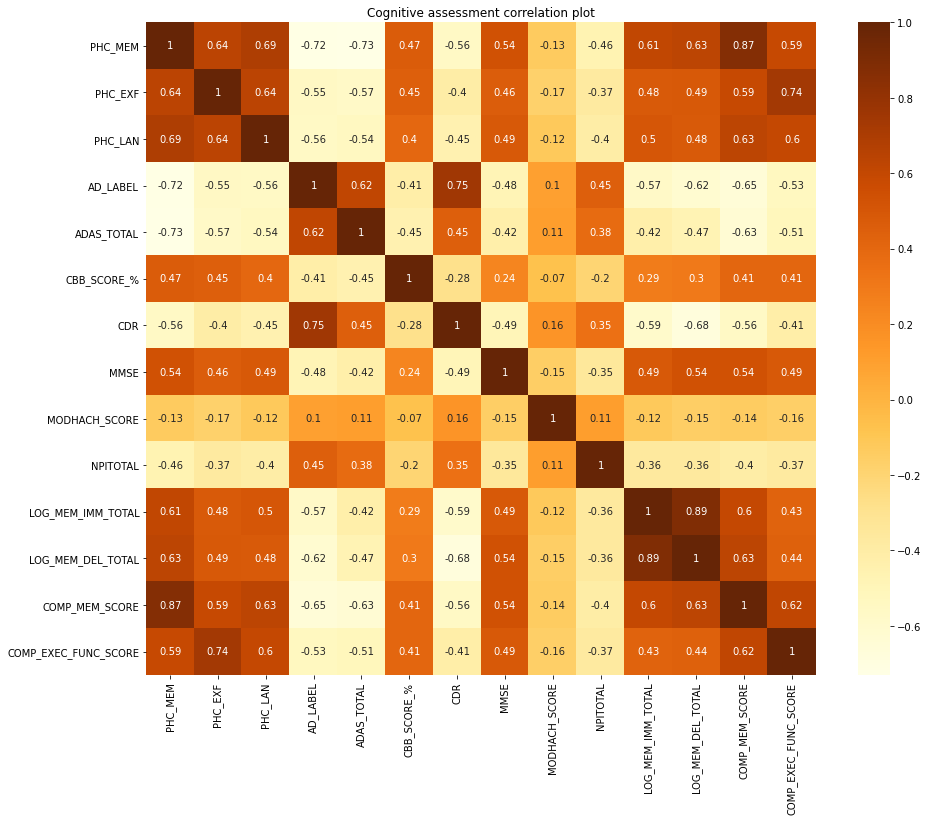

In [10]:
fig, axs = plt.subplots(figsize=(15, 12))
sns.heatmap(
    np.round(cog_df.corr(), 2),
    fmt='g',
    annot=True,
    cmap='YlOrBr',
)
axs.set_title("Cognitive assessment correlation plot")

**Cognitive assessment box plots for CN, MCI and AD labels**

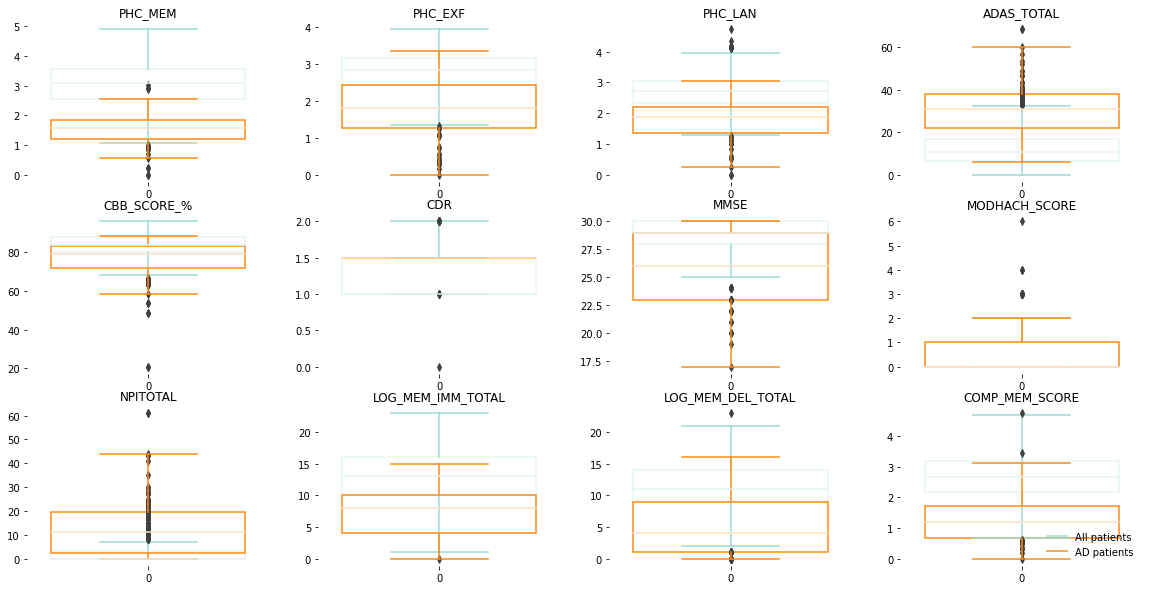

In [11]:
fig, axs = plt.subplots(figsize=(20, 10), ncols=4, nrows=3)
axs_flat = [a for ax in axs for a in ax]

cog_cols = [c for c in cog_df.columns if c not in ['RID', 'AD_LABEL']]
for ax, col in zip(axs_flat, cog_cols):
    sns.boxplot(data=df[col], orient="v", ax=ax, **ALL_BOXPLOT_STYLE)
    ax.set_title(col)
    
    # overlap AD subjects
    sns.boxplot(data=ad_df[col].values, ax=ax, **AD_BOXPLOT_STYLE)
    
# set legend colors to match colour usage in graph
leg = axs_flat[-1].legend(labels=['All patients', 'AD patients'], loc="lower right", frameon=False)    
leg.legendHandles[1].set_color(accent)
    
# remove borders
sns.despine(left=True, bottom=True)

Max and min ranges for cognitive assessment scores of non-AD and AD subjects.

In [12]:
non_ad_df[cog_cols].agg(['min', 'max'])

,PHC_MEM,PHC_EXF,PHC_LAN,ADAS_TOTAL,CBB_SCORE_%,CDR,MMSE,MODHACH_SCORE,NPITOTAL,LOG_MEM_IMM_TOTAL,LOG_MEM_DEL_TOTAL,COMP_MEM_SCORE,COMP_EXEC_FUNC_SCORE
min,1.350,1.340,1.379,0.00,53.424658,0.0,19.0,0.0,0.0,3.0,0.0,0.705,0.264
max,4.888,3.921,4.717,52.33,95.530726,2.0,30.0,6.0,28.0,23.0,23.0,4.759,5.909


In [13]:
ad_df[cog_cols].agg(['min', 'max'])

,PHC_MEM,PHC_EXF,PHC_LAN,ADAS_TOTAL,CBB_SCORE_%,CDR,MMSE,MODHACH_SCORE,NPITOTAL,LOG_MEM_IMM_TOTAL,LOG_MEM_DEL_TOTAL,COMP_MEM_SCORE,COMP_EXEC_FUNC_SCORE
min,0.000,0.000,0.000,6.00,20.930233,1.0,17.0,0.0,0.0,0.0,0.0,0.000,0.000
max,3.008,3.351,3.039,68.33,87.777778,2.0,30.0,3.0,61.0,15.0,16.0,3.455,5.239


### MRI / PET features

Use graph to find notable correlaries (highest postive and highest negative).

In [14]:
mri_df_cols = list(df.iloc[:, 20:].columns)

In [15]:
mri_corr = df[mri_df_cols + ['AD_LABEL']].corr()

# skip the most positive correlary as it will be AD_LABEL
top_pos_corr_cols = list(mri_corr['AD_LABEL']
                                .sort_values(ascending=False)[1:6]
                                .index
                               )
top_neg_corr_cols = list(mri_corr['AD_LABEL']
                                .sort_values()[:5]
                                .index
                               )
notable_mri_cols = top_pos_corr_cols + top_neg_corr_cols

<AxesSubplot:>

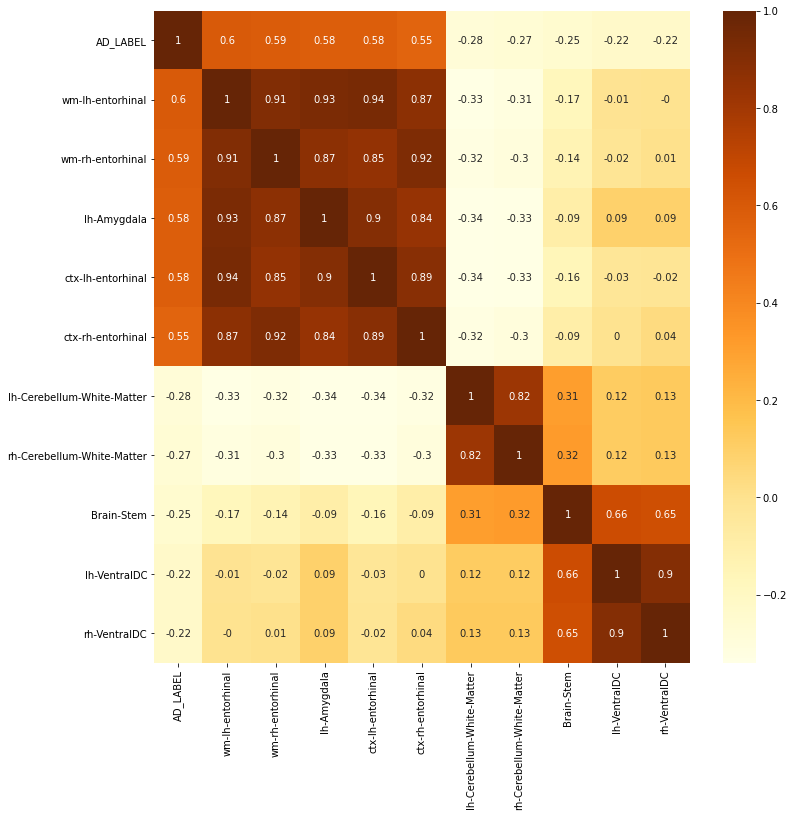

In [16]:
fig, axs = plt.subplots(figsize=(12, 12))

sns.heatmap(
    np.round(df[['AD_LABEL'] + notable_mri_cols].corr(), 2),
    fmt='g',
    cmap='YlOrBr' ,
    annot=True
)

**MRI / PET histograms for high correlary columns for CN, MCI and AD labels**

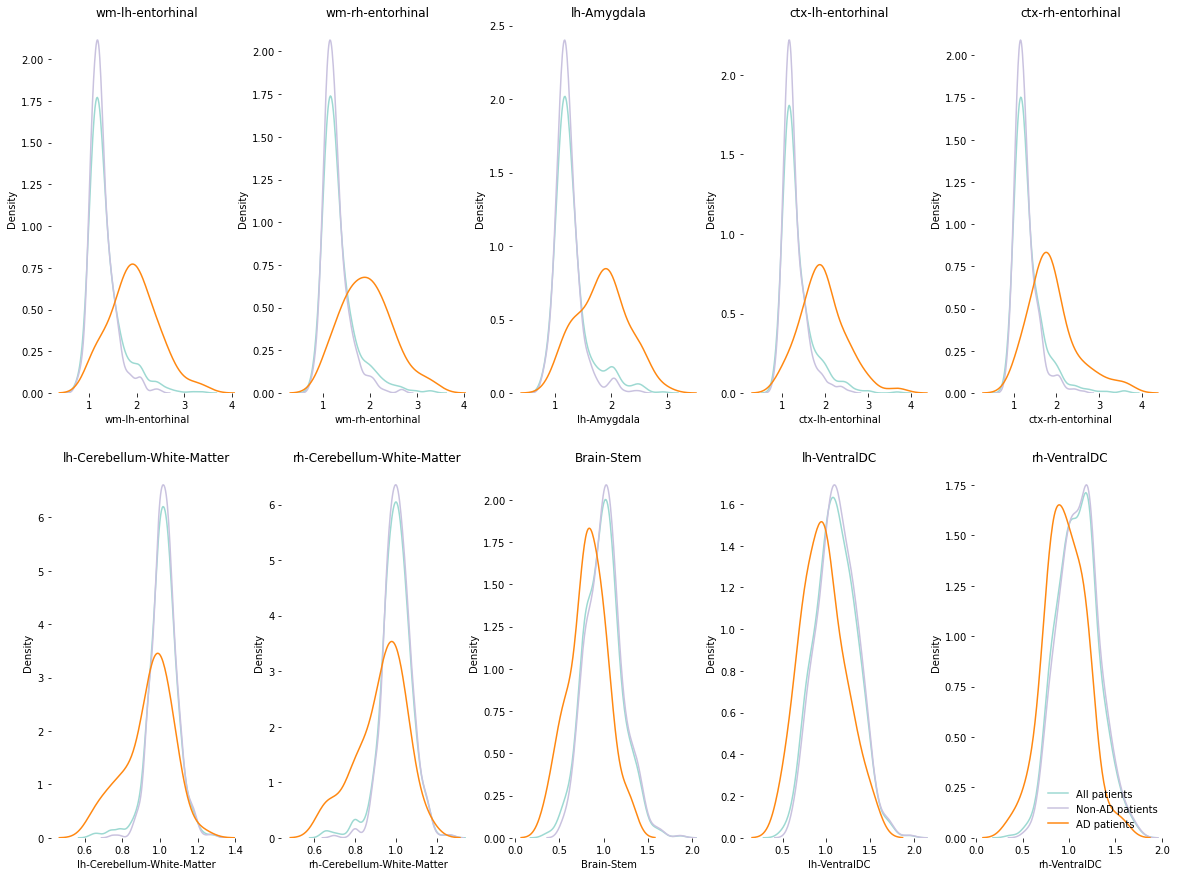

In [17]:
fig, axs = plt.subplots(figsize=(20, 15), ncols=5, nrows=2)

axs_flat = [a for ax in axs for a in ax]
for ax, col in zip(axs_flat, notable_mri_cols):
    sns.kdeplot(data=df[col], color=secondary, ax=ax)
    ax.set_title(col)
    
    # overlap non-AD subjects
    sns.kdeplot(data=non_ad_df[col], color=tertiary_light, ax=ax)
    
    # overlap AD subjects
    sns.kdeplot(data=ad_df[col], color=accent, ax=ax)
    
# set legend colors to match colour usage in graph
leg = axs_flat[-1].legend(labels=['All patients', 'Non-AD patients', 'AD patients'], loc="lower right", frameon=False)    
leg.legendHandles[1].set_color(tertiary_light)
leg.legendHandles[2].set_color(accent)
    
# remove borders
sns.despine(left=True, bottom=True)

Max and min ranges for *notable* MRI / PET datapoints of non-AD and AD subjects.

In [18]:
non_ad_df[notable_mri_cols].agg(['min', 'max'])

,wm-lh-entorhinal,wm-rh-entorhinal,lh-Amygdala,ctx-lh-entorhinal,ctx-rh-entorhinal,lh-Cerebellum-White-Matter,rh-Cerebellum-White-Matter,Brain-Stem,lh-VentralDC,rh-VentralDC
min,0.739515,0.776320,0.757919,0.833448,0.796113,0.745236,0.696351,0.537273,0.608044,0.534222
max,2.475177,2.683318,2.508378,2.595666,2.638751,1.289487,1.270947,1.866383,1.951539,1.768257


In [19]:
ad_df[notable_mri_cols].agg(['min', 'max'])

,wm-lh-entorhinal,wm-rh-entorhinal,lh-Amygdala,ctx-lh-entorhinal,ctx-rh-entorhinal,lh-Cerebellum-White-Matter,rh-Cerebellum-White-Matter,Brain-Stem,lh-VentralDC,rh-VentralDC
min,1.04650,1.023411,0.989434,0.994773,1.030062,0.632908,0.642454,0.350726,0.479934,0.368382
max,3.37254,3.310941,2.918040,3.677403,3.625967,1.225420,1.151137,1.296758,1.543496,1.574959


### CDR analysis

In [20]:
pd.DataFrame(df['CDR'].value_counts())

,CDR
1.0,368
1.5,183
2.0,12
0.0,1


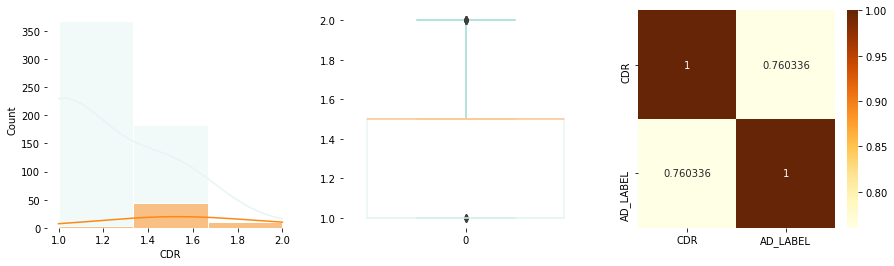

In [21]:
fig, axs = plt.subplots(ncols=3, figsize=(15, 4))

cdr_df = df[df['CDR'] > 0]
sns.boxplot(data=cdr_df['CDR'], orient='v', ax=axs[1], **ALL_BOXPLOT_STYLE)
sns.histplot(
    data=cdr_df['CDR'],
    bins=3,
    kde=True,
    kde_kws={'bw_adjust': 3},
    ax=axs[0],
    **ALL_HISTPLOT_STYLE
)
sns.heatmap(
    cdr_df[['CDR', 'AD_LABEL']].corr(),
    fmt='g',
    annot=True,
    cmap='YlOrBr' 
)

# overlap AD subjects
ad_cdr_df = ad_df[ad_df['CDR'] > 0]
sns.boxplot(data=ad_cdr_df['CDR'].values, orient='v', ax=axs[1], **AD_BOXPLOT_STYLE)
sns.histplot(
    data=ad_cdr_df['CDR'],
    bins=3,
    kde=True,
    kde_kws={'bw_adjust': 3},
    ax=axs[0],
    **AD_HISTPLOT_STYLE
)

# remove borders
sns.despine(left=True, bottom=True)

Max and min ranges for `CDR` datapoints of of non-AD and AD subjects.

In [22]:
non_ad_df['CDR'].agg(['min', 'max'])

min    0.0
max    2.0
Name: CDR, dtype: float64

In [23]:
ad_df['CDR'].agg(['min', 'max'])

min    1.0
max    2.0
Name: CDR, dtype: float64

### MMSE Analysis

Columns analysed:
- MMscore

The MMSE scores illustrate **significant negative skewness**. This is reflected in a skewness value of `-2.3`.
This is because of the way in which MMSE scores are represented, where higher scores indicate a
healthy "mental state" while lower scores are generally pernicious.

A high-value for the mean highlights that this dataset is quite imbalanced with most of the samples
falling into a healthy "mental state".

In [24]:
df_mmse = df['MMSE'].to_frame()
print(f"""
      min mmse: {df_mmse.min()[0]}
      max mmse: {df_mmse.max()[0]}
      mean mmse: {df_mmse.mean()[0]}
      mean male mmse: {df_mmse.mean()[0]}
      std. dev: {df_mmse.std()[0]}
      skewness: {df_mmse.skew()[0]}
      kurtosis: {df_mmse.kurtosis()[0]}
""")


      min mmse: 17.0
      max mmse: 30.0
      mean mmse: 28.586879432624112
      mean male mmse: 28.586879432624112
      std. dev: 1.9279854051730387
      skewness: -2.310070380734938
      kurtosis: 6.64986630242418



As expected, MMSE score has quite a high correlation with the outcome of the alzheimers classification
itself where affliced patients of AD are less likely to score high in the MMSE test.

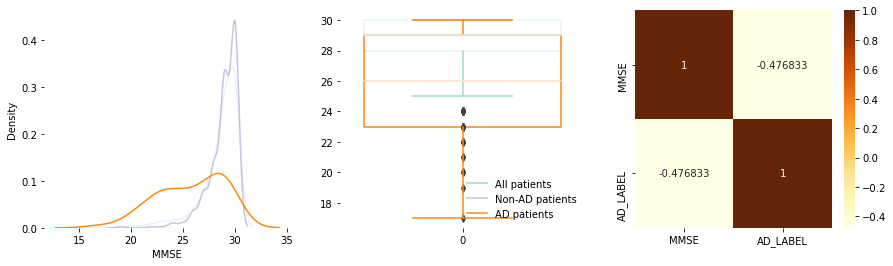

In [25]:
fig, axs = plt.subplots(ncols=3, figsize=(15, 4))

sns.kdeplot(
    df['MMSE'],
    ax=axs[0],
    color=secondary_light
)
sns.boxplot(data=df['MMSE'], orient='v', ax=axs[1], **ALL_BOXPLOT_STYLE)
sns.heatmap(
    df[['MMSE', 'AD_LABEL']].corr(),
    fmt='g',
    annot=True,
    cmap='YlOrBr',
    ax=axs[2]
)

# overlap non-AD subjects
sns.kdeplot(
    non_ad_df['MMSE'],
    ax=axs[0],
    color=tertiary_light,
)

# overlap AD subjects
sns.kdeplot(
    ad_df['MMSE'],
    ax=axs[0],
    color=accent,
)
sns.boxplot(data=ad_df['MMSE'].values, orient='v', ax=axs[1], **AD_BOXPLOT_STYLE)

# set legend colors to match colour usage in graph
leg = axs[1].legend(labels=['All patients', 'Non-AD patients', 'AD patients'], loc="lower right", frameon=False)    
leg.legendHandles[1].set_color(tertiary_light)
leg.legendHandles[2].set_color(accent)

# remove borders
sns.despine(left=True, bottom=True)

Max and min ranges for `MMSE` datapoints of non-AD and AD subjects.

In [26]:
non_ad_df['MMSE'].agg(['min', 'max'])

min    19.0
max    30.0
Name: MMSE, dtype: float64

In [27]:
ad_df['MMSE'].agg(['min', 'max'])

min    17.0
max    30.0
Name: MMSE, dtype: float64

### Long memory recall analysis

Columns analysed:
- Logical memory immediate recall (LOG_MEM_IMM_TOTAL)
- Logical memory delayed recall (LOG_MEM_DEL_TOTAL)

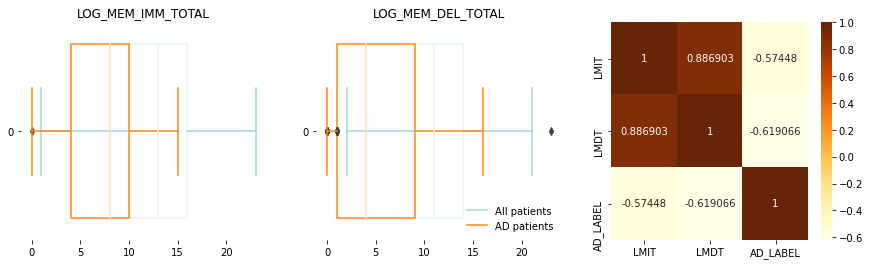

In [28]:
fig, axs = plt.subplots(figsize=(15, 4), ncols=3)

lm_cols = ['LOG_MEM_IMM_TOTAL', 'LOG_MEM_DEL_TOTAL']

sns.boxplot(data=df['LOG_MEM_IMM_TOTAL'], orient='h', ax=axs[0], **ALL_BOXPLOT_STYLE)
axs[0].set_title("LOG_MEM_IMM_TOTAL")

sns.boxplot(data=df['LOG_MEM_DEL_TOTAL'], orient='h', ax=axs[1], **ALL_BOXPLOT_STYLE)
axs[1].set_title("LOG_MEM_DEL_TOTAL")

# shorten labels before producing heatmap
lm_corr = df[lm_cols + ['AD_LABEL']].corr()
lm_corr.columns = ['LMIT', 'LMDT', 'AD_LABEL']
lm_corr.index = ['LMIT', 'LMDT', 'AD_LABEL']
sns.heatmap(
    lm_corr,
    fmt='g',
    annot=True,
    cmap='YlOrBr',
    ax=axs[2]
)

# overlap AD subjects
sns.boxplot(data=ad_df['LOG_MEM_IMM_TOTAL'].values, orient='h', ax=axs[0], **AD_BOXPLOT_STYLE)
axs[0].set_title("LOG_MEM_IMM_TOTAL")

sns.boxplot(data=ad_df['LOG_MEM_DEL_TOTAL'].values, orient='h', ax=axs[1], **AD_BOXPLOT_STYLE)
axs[1].set_title("LOG_MEM_DEL_TOTAL")

# set legend colors to match colour usage in graph
leg = axs[1].legend(labels=['All patients', 'AD patients'], loc="lower right", frameon=False)    
leg.legendHandles[1].set_color(accent)

# remove borders
sns.despine(left=True, bottom=True)

As expected, we can see that there patients that have been diagnosed with Alzheimer's disease tend to score poorly in
both the *logical memory immediate recall* and *logical memory delayed recall tests*

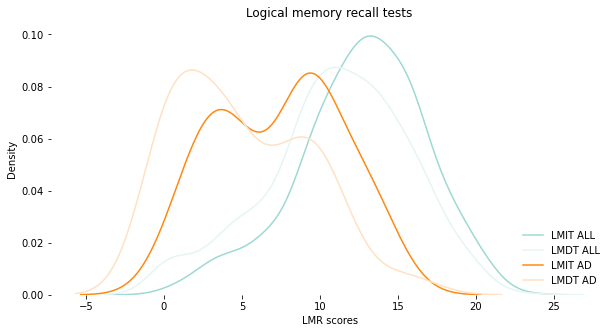

In [29]:
fig, axs = plt.subplots(figsize=(10, 5))

sns.kdeplot(data=df['LOG_MEM_IMM_TOTAL'], ax=axs, color=secondary)
sns.kdeplot(data=df['LOG_MEM_DEL_TOTAL'], ax=axs, color=secondary_light)

# overlap AD subjects
sns.kdeplot(data=ad_df['LOG_MEM_IMM_TOTAL'], ax=axs, color=accent)
sns.kdeplot(data=ad_df['LOG_MEM_DEL_TOTAL'], ax=axs, color=accent_light)

axs.set_xlabel("LMR scores")
axs.set_title("Logical memory recall tests")
axs.legend(labels=["LMIT ALL", "LMDT ALL", "LMIT AD", "LMDT AD"], loc="lower right", frameon=False)

# remove borders
sns.despine(left=True, bottom=True)

Max and min ranges for `LOG_MEM_IMM_TOTAL` and `LOG_MEM_DEL_TOTAL` datapoints of non-AD and AD subjects.

In [30]:
non_ad_df[lm_cols].agg(['min', 'max']).head()

,LOG_MEM_IMM_TOTAL,LOG_MEM_DEL_TOTAL
min,3.0,0.0
max,23.0,23.0


In [31]:
ad_df[lm_cols].agg(['min', 'max'])

,LOG_MEM_IMM_TOTAL,LOG_MEM_DEL_TOTAL
min,0.0,0.0
max,15.0,16.0


### Clinical diagnosis analysis

Columns analysed:
- AD_LABEL

Percentage of men and women *clinically* diagnosed.

Total diagnosed: 59

Total Healthy-control: 138

Total Mild-cognitive impairment: 367

Female: 52.3%

Male: 47.7%

In [32]:
pd.DataFrame(df['AD_LABEL'].value_counts())

,AD_LABEL
1.0,367
2.0,138
3.0,59


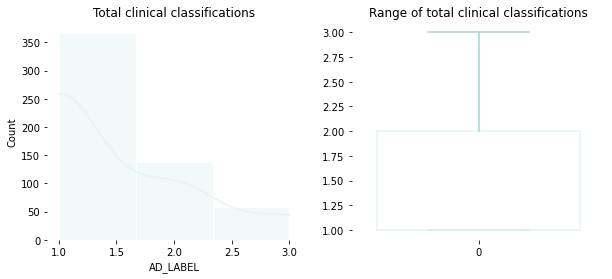

In [33]:
fig, axs = plt.subplots(figsize=(10, 4), ncols=2)

sns.histplot(
    data=df['AD_LABEL'],
    bins=3,
    kde=True,
    kde_kws={'bw_adjust': 2},
    ax=axs[0],
    **ALL_HISTPLOT_STYLE
)
axs[0].set_title("Total clinical classifications")

sns.boxplot(data=df['AD_LABEL'], ax=axs[1], **ALL_BOXPLOT_STYLE)
axs[1].set_title("Range of total clinical classifications")

# remove borders
sns.despine(left=True, bottom=True)

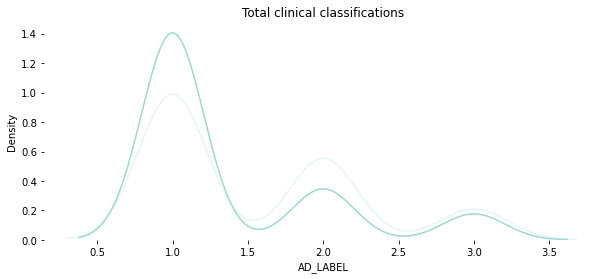

In [34]:
fig, axs = plt.subplots(figsize=(10, 4))

female_class = df[df['PTGENDER'] == 1]
male_class = df[df['PTGENDER'] == 0]

sns.kdeplot(
    data=male_class['AD_LABEL'],
    ax=axs,
    color=secondary_light
)
sns.kdeplot(
    data=female_class['AD_LABEL'],
    ax=axs,
    color=secondary
)

axs.set_title("Total clinical classifications")

# remove borders
sns.despine(left=True, bottom=True)

Percentage of men and women *clinically* diagnosed with dimentia.

Total diagnosed: 59 (10% of total)

Female: 27 (46% of diagnosed)

Male: 32 (54% of diagnosed)

In [35]:
total_ad = len(ad_df)

f_with_ad = ad_df[ad_df['PTGENDER'] == 1]
m_with_ad = ad_df[ad_df['PTGENDER'] == 0]

print(f'Total ad: {total_ad} F: {(len(f_with_ad))}  M: {(len(m_with_ad))}')
print(f'Female (%): {(len(f_with_ad) / total_ad) * 100}')
print(f'Male (%): {(len(m_with_ad) / total_ad) * 100}')

Total ad: 59 F: 27  M: 32
Female (%): 45.76271186440678
Male (%): 54.23728813559322


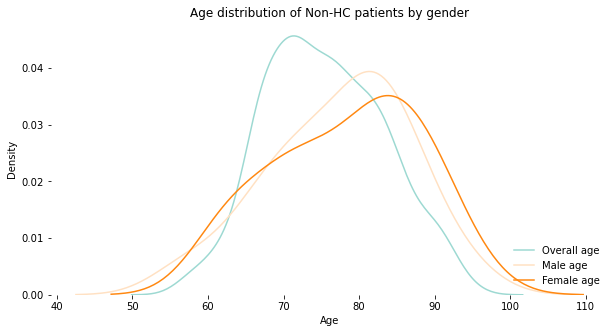

In [36]:
fig, axs = plt.subplots(figsize=(10, 5))

sns.kdeplot(df['AGE'], color=secondary, ax=axs)
sns.kdeplot(m_with_ad['AGE'], color=accent_light, ax=axs)
sns.kdeplot(data=f_with_ad['AGE'], color=accent, ax=axs)


axs.set_xlabel("Age")
axs.set_title("Age distribution of Non-HC patients by gender")
axs.legend(
    labels=["Overall age", "Male age", "Female age"],
    loc="lower right",
    frameon=False
)

# remove borders
sns.despine(left=True, bottom=True)

In [37]:
print(f"Male AD age mean: {m_with_ad['AGE'].mean()}")
print(f"Female AD age mean: {f_with_ad['AGE'].mean()}")

Male AD age mean: 77.397934375
Female AD age mean: 78.40474444444445
